In [ ]:
#https://librosa.github.io/librosa/generated/librosa.core.cqt.html

In [2]:
import librosa
from librosa import display
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [3]:
y, sr = librosa.load('T2_1000001.wav')
qtrans = librosa.cqt(y, sr=sr)

In [4]:
# get log power Q-spectrogram
qS = np.abs(qtrans)
qS = qS**2

# power spectrum of Q-transform
qspec = librosa.logamplitude(qS, amin=1e-10, top_db=80.0).astype('float32')

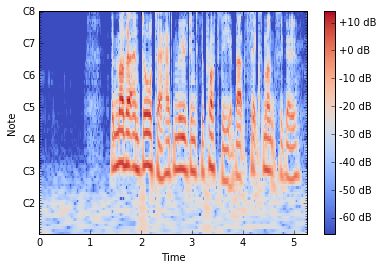

In [5]:
b = librosa.display.specshow(qspec,sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [6]:
#resample
def resample(s, fs_orig, fs_new, axis=0, best_algorithm=True):
    fs_orig = int(fs_orig)
    fs_new = int(fs_new)
    if fs_orig != fs_new:
        import resampy
        s = resampy.resample(s, sr_orig=fs_orig, sr_new=fs_new, axis=axis,
                             filter='kaiser_best' if best_algorithm else 'kaiser_fast')
    return s

In [7]:
qspec.shape

(84L, 227L)

In [8]:
res_qspec = resample(qspec, sr, 44000).shape

In [16]:
cqcc = scipy.fftpack.dct(res_qspec, type = 2, norm = 'ortho', axis = 0)
print cqcc

[ 278.60007179  -42.42640687]


In [17]:
qspec

array([[-22.80553246, -22.82855797, -22.9251194 , ..., -25.89164352,
        -25.98789406, -26.04748535],
       [-39.16650772, -36.83085632, -32.87358475, ..., -43.34309387,
        -40.63331604, -39.50143433],
       [-28.24137115, -28.29128075, -28.5159626 , ..., -40.07460403,
        -42.52839279, -43.73797989],
       ..., 
       [-65.70788574, -65.70788574, -65.70788574, ..., -65.70788574,
        -65.70788574, -59.6559906 ],
       [-65.70788574, -65.70788574, -65.70788574, ..., -65.70788574,
        -65.70788574, -56.07416534],
       [-65.70788574, -65.70788574, -65.70788574, ..., -65.14888763,
        -65.70788574, -57.64100266]], dtype=float32)